# Visualising FITS and star positions

## Import modules

In [6]:
import os
os.chdir('/home/jovyan/work/src')
import reading
import numpy as np
import math
import matplotlib.pyplot as plt
from pathlib import Path
from astropy.io import fits
from astropy.wcs import WCS
from matplotlib.colors import LogNorm
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Set reference frame, global vars

In [40]:
print(os.getcwd())
#vastdir="../inputfiles/wwcra2015vast/"
vastdir="../notebooks/data"

#reference_frame = Path(vastdir) / "new-image.fits"
#reference_frame = Path(vastdir) / "WWCrA#30V_000435945_FLAT.fit"
reference_frame = Path(vastdir) / "WWCrA#30V_000435945.FIT"
FITS_FILE=reference_frame
FITS_FILE_FTS=reference_frame
wcs_file = reference_frame
PADDING = 200
print(FITS_FILE_FTS, os.getcwd())

/home/jovyan/work/src
../notebooks/data/WWCrA#30V_000435945.FIT /home/jovyan/work/src


In [41]:
def getWcs(wcs_file):
    hdulist = fits.open(wcs_file)
    data = hdulist[0].data.astype(float)
    header = hdulist[0].header
    wcs = WCS(header)
    return wcs

wcs = getWcs(wcs_file)



In [42]:
print(wcs)


WCS Keywords

Number of WCS axes: 2
CTYPE : ''  ''  
CRVAL : 0.0  0.0  
CRPIX : 0.0  0.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : 1.0  1.0  
NAXIS : 1365  1365


## Get comparison Star

## Draw the image

../notebooks/data/WWCrA#30V_000435945.FIT
2299.0 65535.0 2546.0


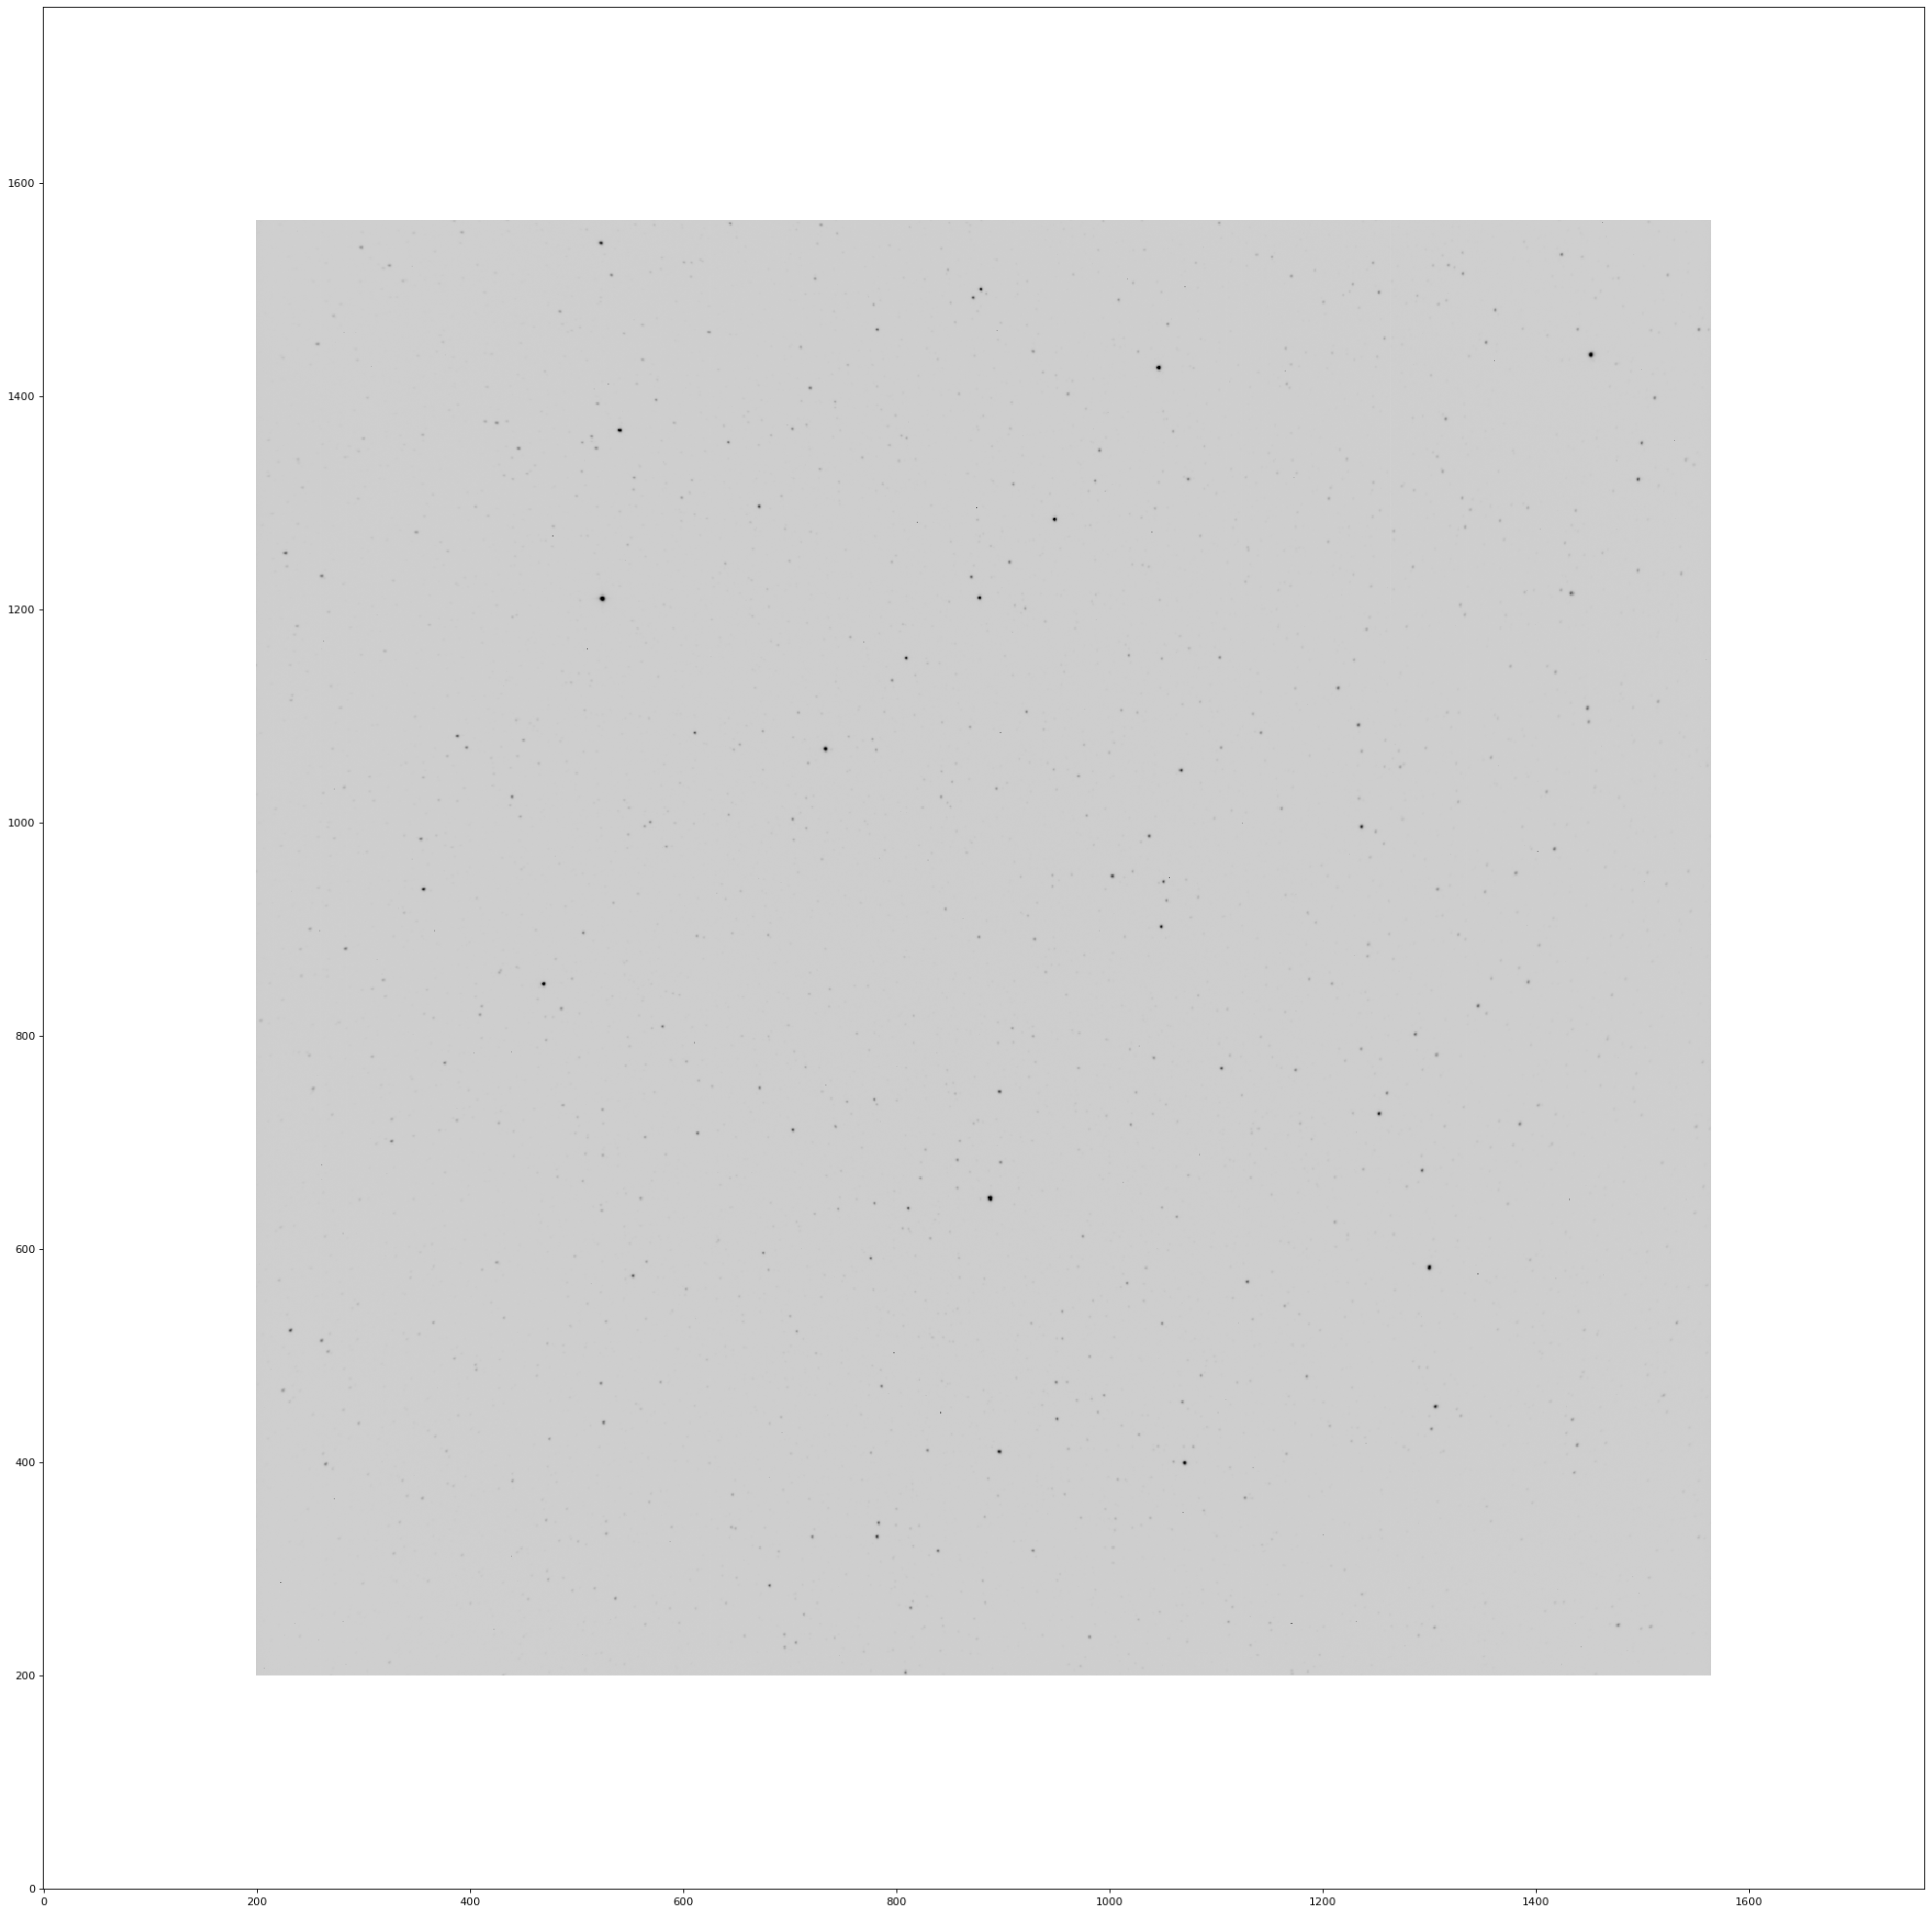

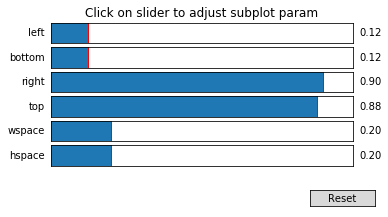

In [46]:
print(FITS_FILE)
#print(FITS_FILE_FTS)
#FITS_FILE='/home/jovyan/work'+ FITS_FILE[1:]
#print(FITS_FILE)
hdulist = fits.open(FITS_FILE)
data = hdulist[0].data.astype(float)
orig_data = data
data = np.pad(data, (PADDING,PADDING), 'constant', constant_values=(100, 100))
fig=plt.figure(figsize=(36, 32), dpi= 80, facecolor='w', edgecolor='k')
# target_app = CircularAperture(target_xy, r=20.)    


from astropy.visualization import SqrtStretch
from astropy.visualization import PercentileInterval
from astropy.visualization.mpl_normalize import ImageNormalize

#transform = PercentileInterval(90.)
#stretchdata = transform(data)

normdata = np.divide(data, 65536)
# Create normalizer object
#norm = ImageNormalize(vmin=0., vmax=65536, stretch=SqrtStretch())
norm = ImageNormalize(stretch=SqrtStretch(), clip=False)
print(orig_data.min(), orig_data.max(), np.median(orig_data))


plt.imshow(normdata, cmap='gray_r', origin='lower', norm=norm)

plt.subplot_tool()
plt.show()

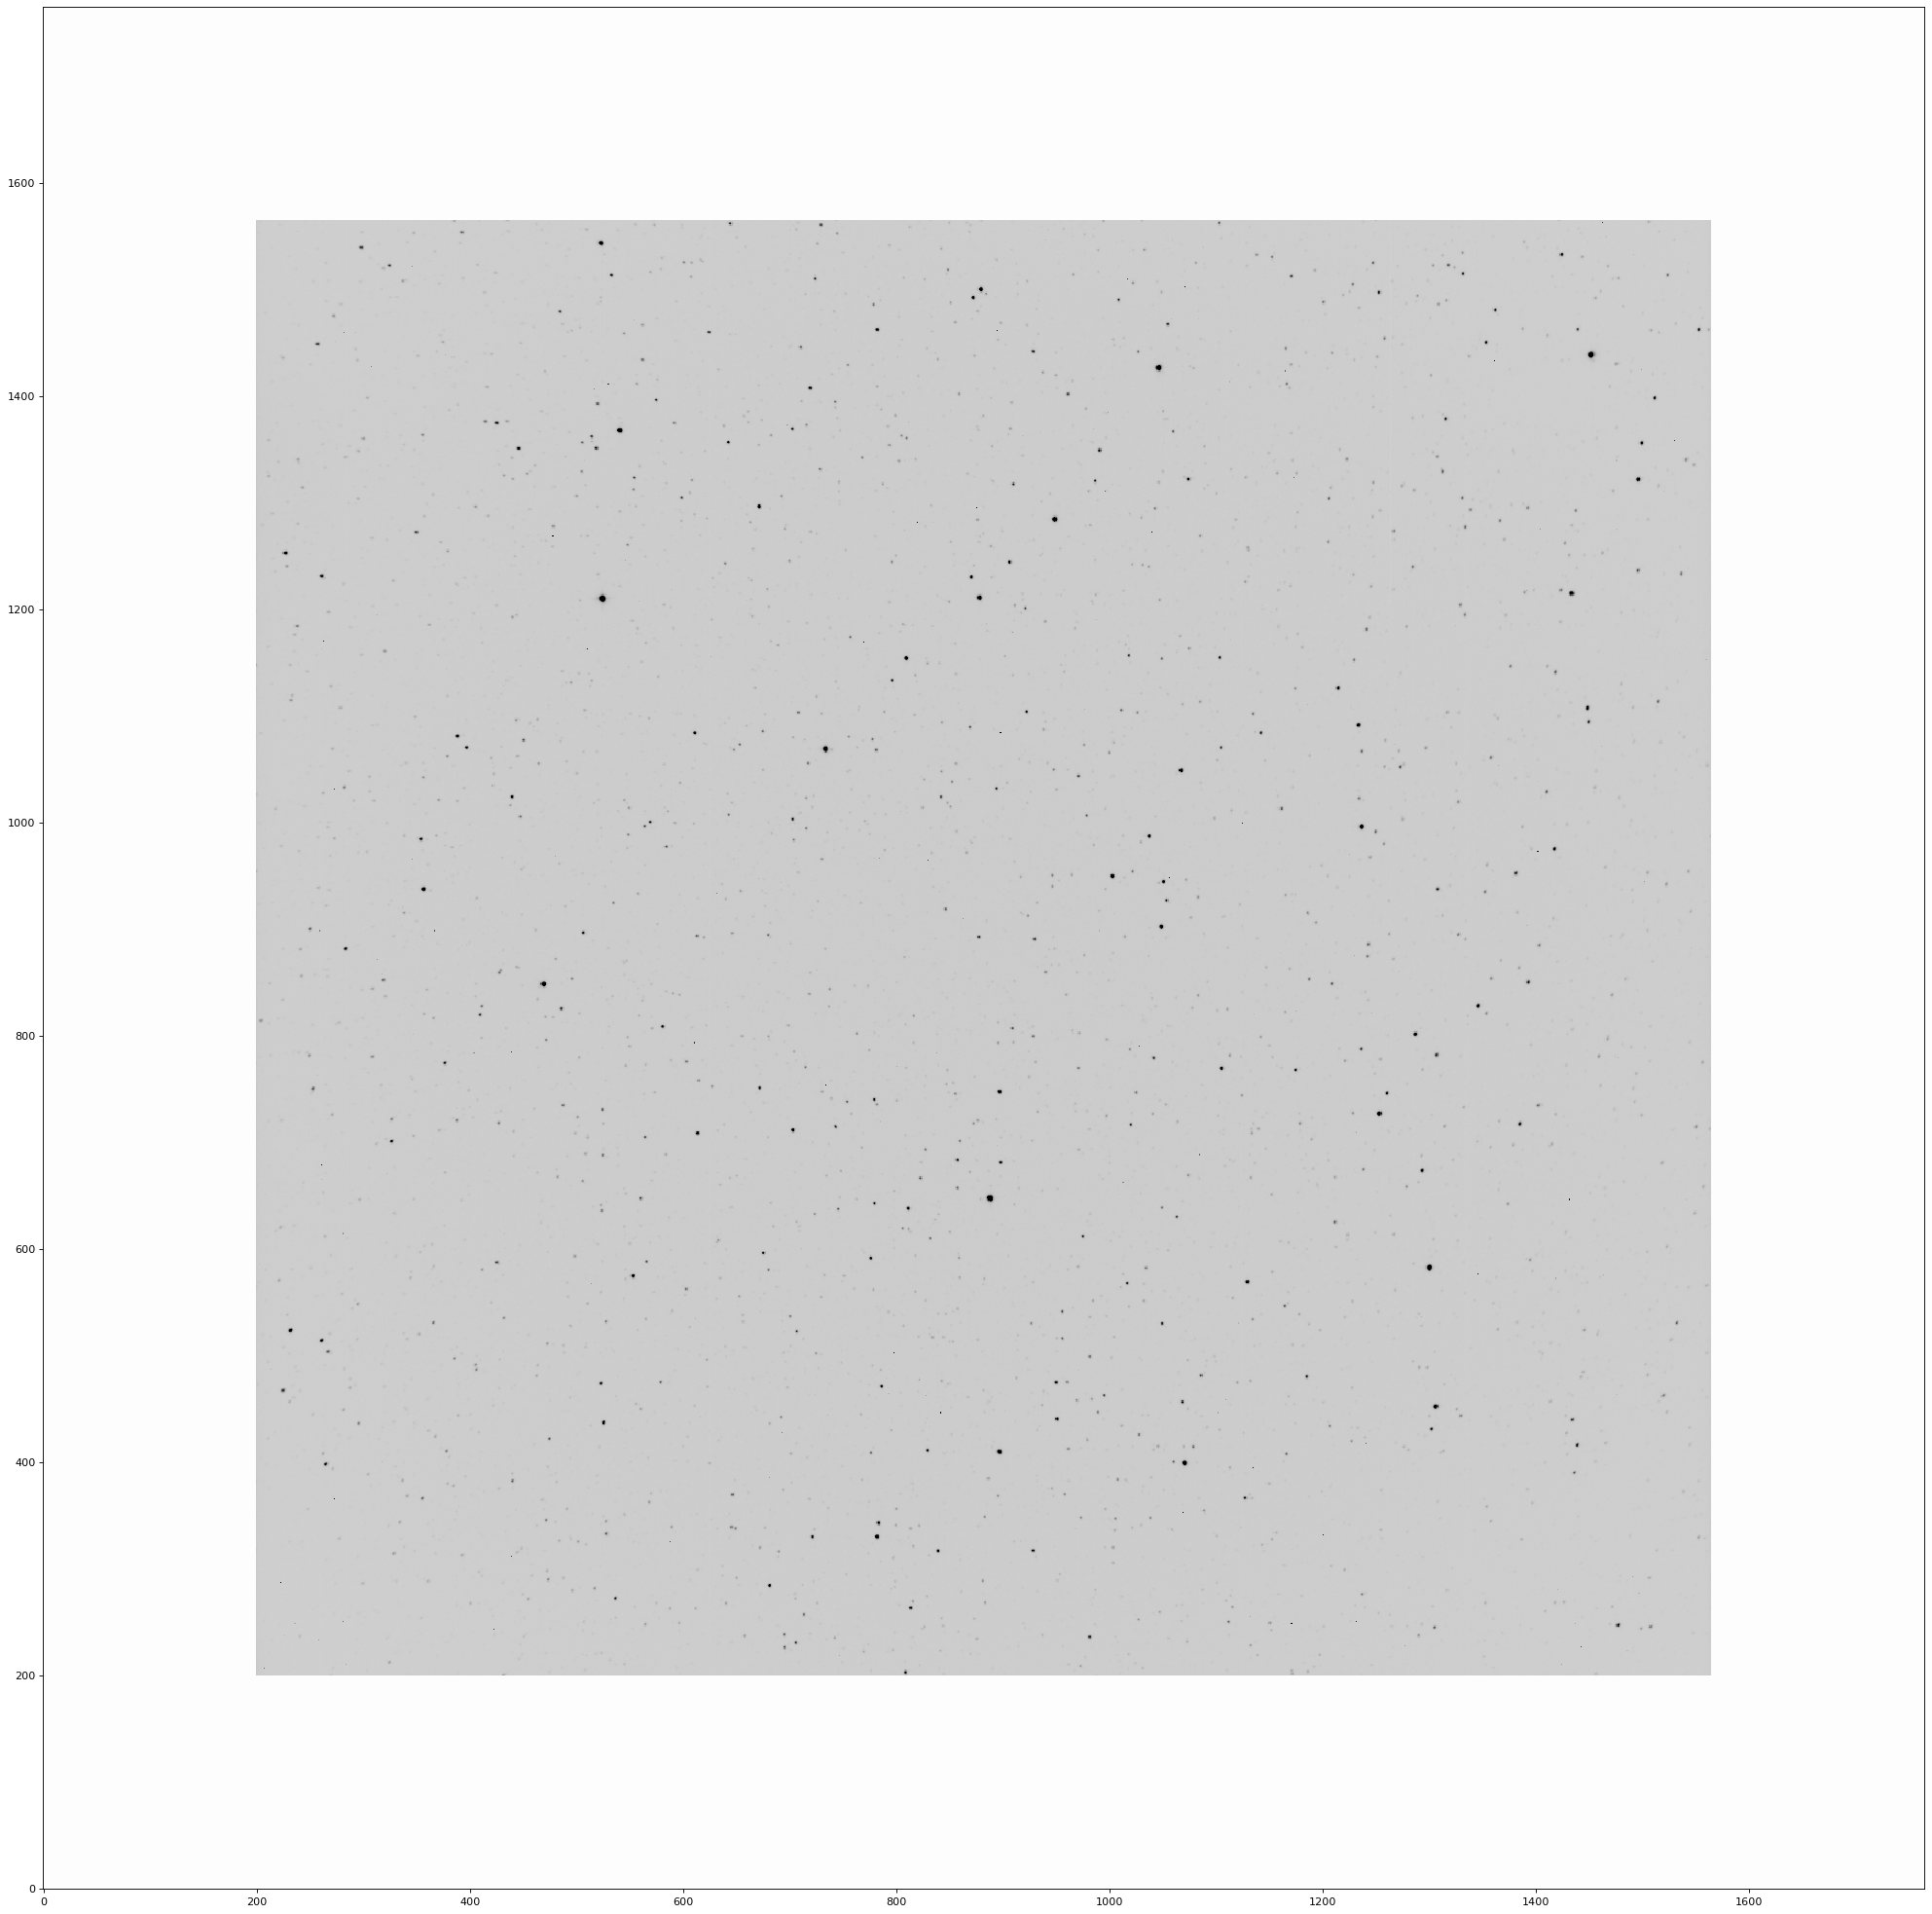

In [44]:
fig=plt.figure(figsize=(36, 32), dpi= 80, facecolor='w', edgecolor='k')
plt.imshow(data, cmap='gray_r', origin='lower', vmin=0, vmax=np.median(orig_data)*5)

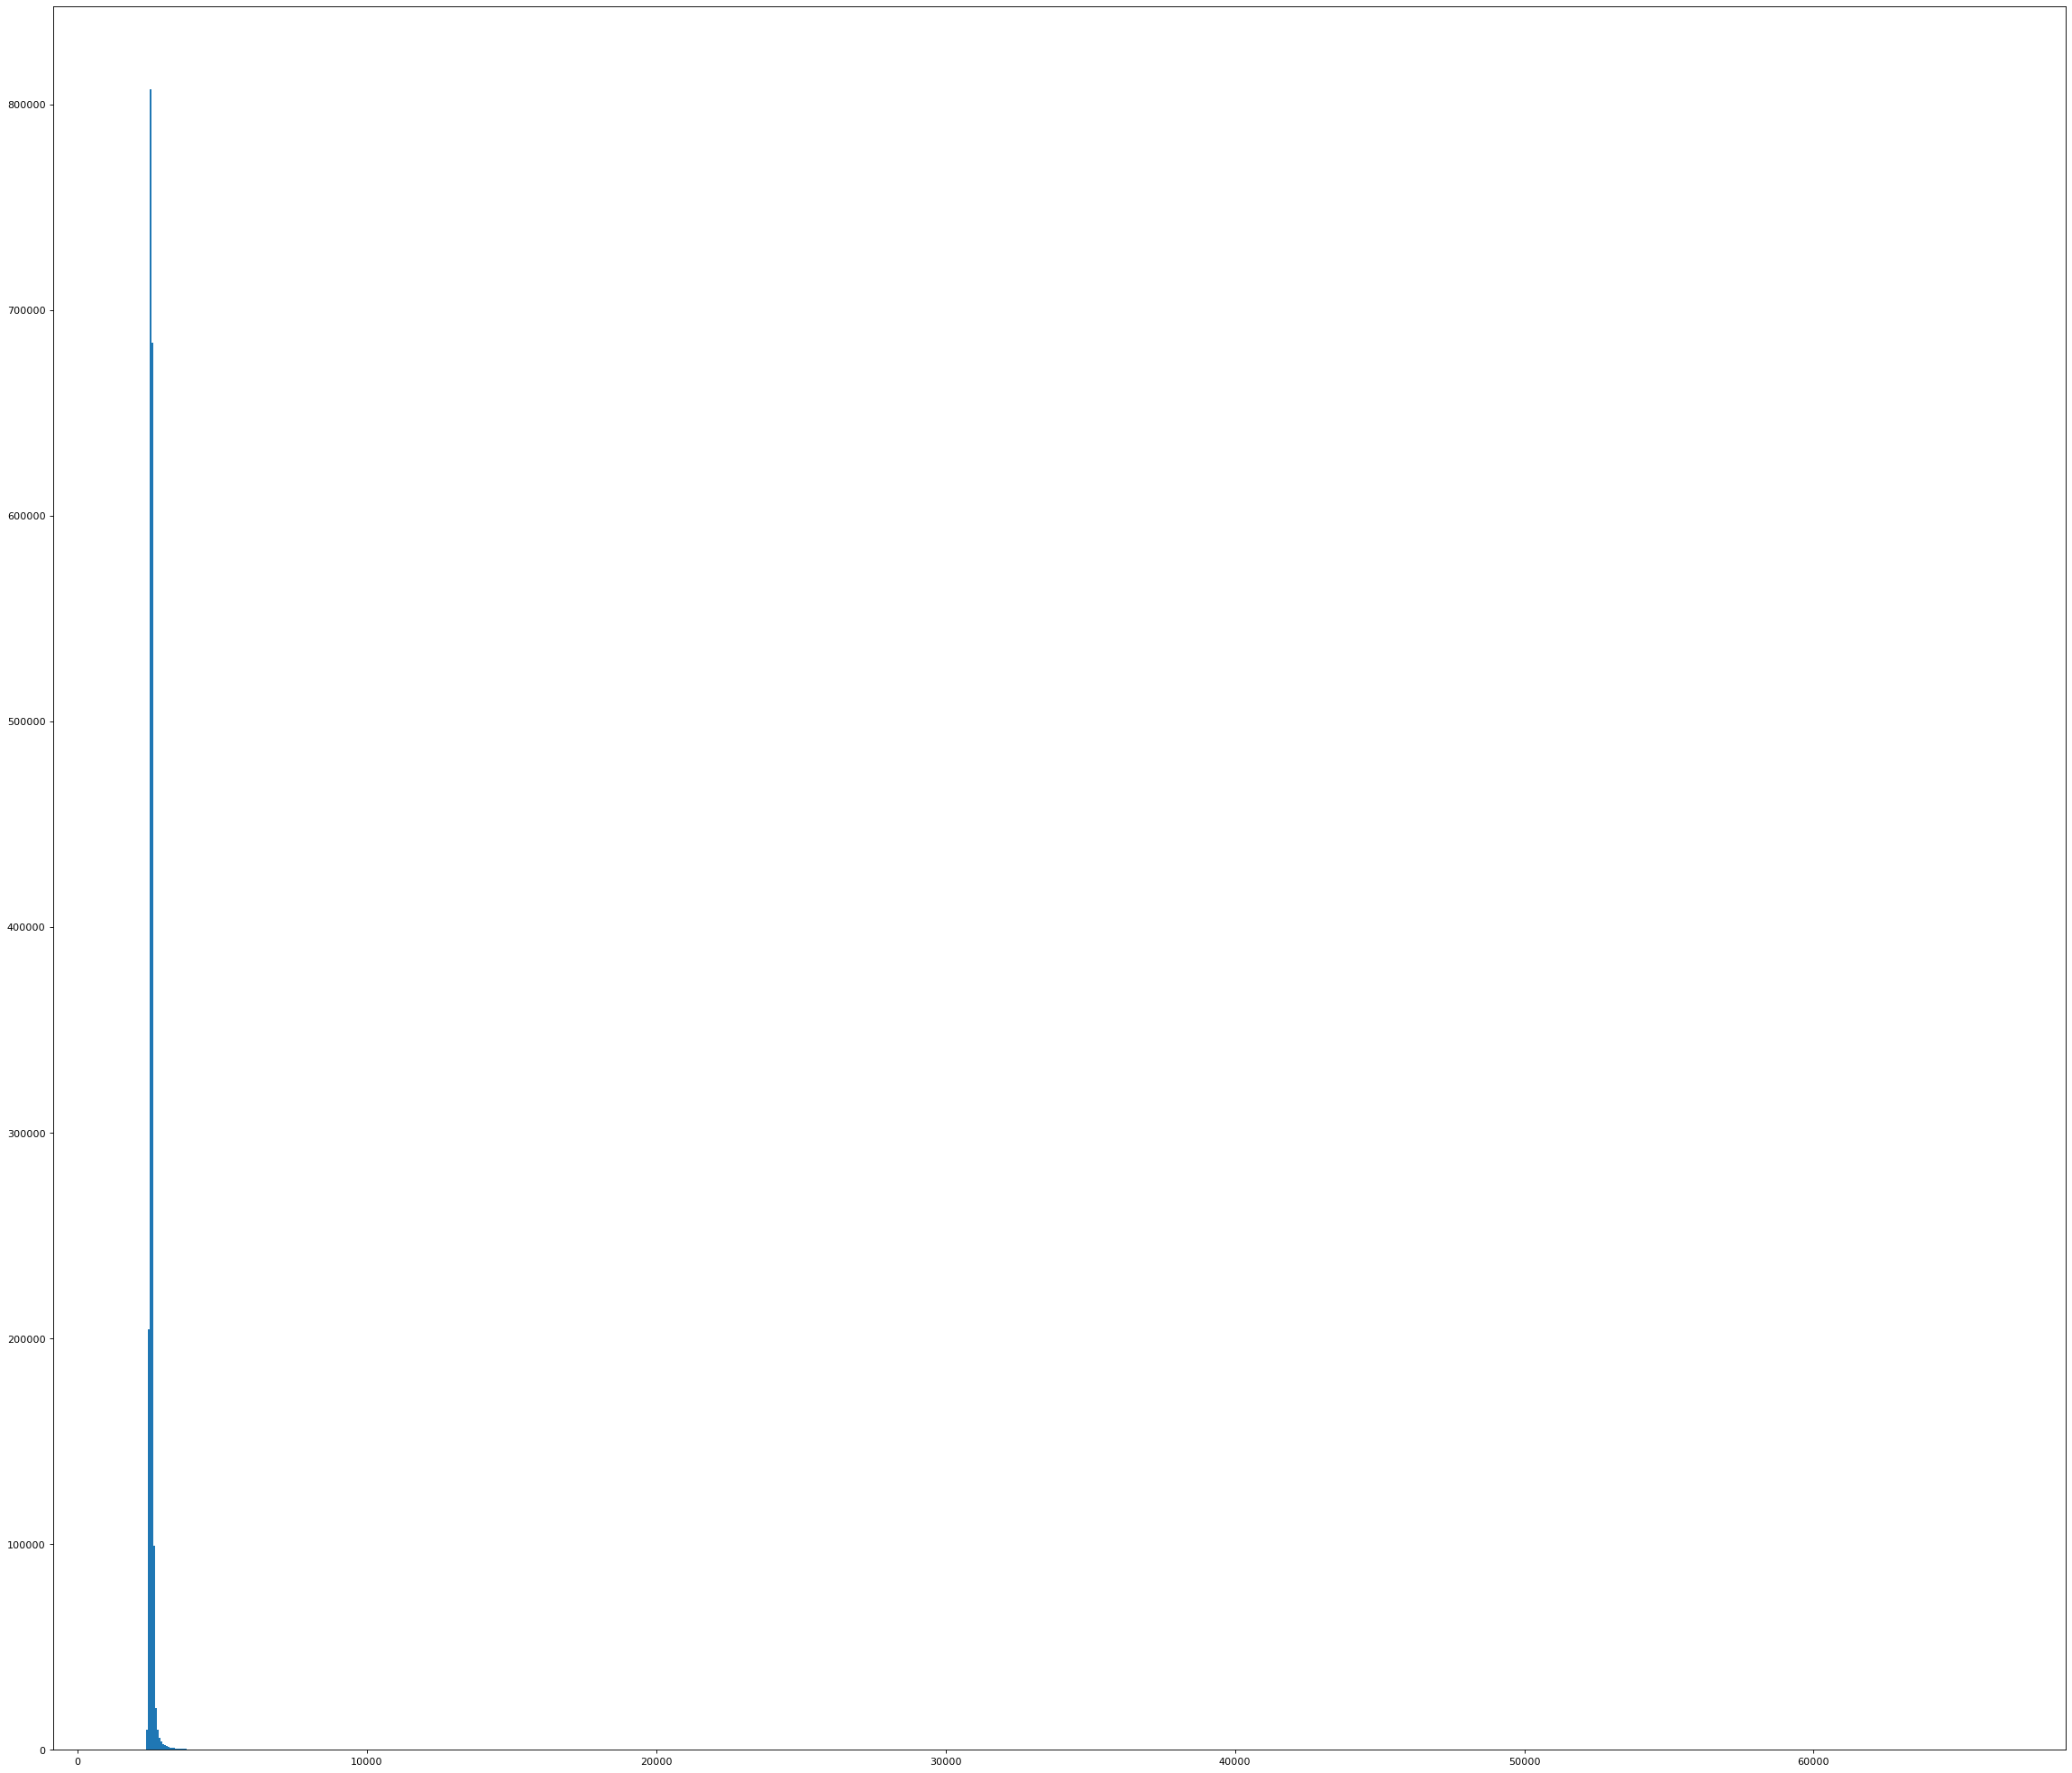

In [45]:
fig=plt.figure(figsize=(36, 32), dpi= 80, facecolor='w', edgecolor='k')
histogram = plt.hist(orig_data.flatten(), 1000)

## Save the image

In [ ]:
fig.savefig(init.basedir+'known_vs_found_10k')
plt.close(fig)